<a href="https://colab.research.google.com/github/VictorGuui/INPE/blob/master/Atividade4_6INPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import xarray as xr

In [24]:
import numpy as np

In [25]:
import matplotlib.pyplot as plt

In [26]:
pip install cartopy

In [27]:
import cartopy.crs as ccrs

In [28]:
import cartopy.feature as cfeature

In [8]:
pip install geopandas

In [9]:
import geopandas as gpd

In [10]:
estados = gpd.read_file("/content/drive/MyDrive/BR_UF_2022.shx")

In [11]:
dsetAnomalia = xr.open_dataset("/content/drive/MyDrive/Climatologia_AmericaDoSul_CHIRPS_1991-2020.nc")

In [12]:
lat = dsetAnomalia.latitude.values
lon = dsetAnomalia.longitude.values
var = dsetAnomalia['precip']

In [13]:
dsetAnomalia

<xarray.Dataset>
Dimensions:    (time: 360, longitude: 1200, latitude: 1300)
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2020-12-01
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 2.0.4 (https://mpimet.m...
    Conventions:       CF-1.6
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    history:           Wed Nov 29 14:58:42 2023: cdo sellonlatbox,-90,-30,-60...
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 2.0.4 (https://mpimet.m...

In [14]:
precipitacao = dsetAnomalia['precip']

In [15]:
precipitacao

<xarray.DataArray 'precip' (time: 360, latitude: 1300, longitude: 1200)>
[561600000 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2020-12-01
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
Attributes:
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    units:               mm/month
    time_step:           month
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

In [16]:
media_climatologica = precipitacao.groupby('time.month').mean(dim='time')

In [17]:
ano = 2004
mes = 1
anomalia_jan_2004 = var.sel(time=f'{ano}-{mes:02d}') - media_climatologica.sel(month=mes)

In [18]:
anomalia_jan_2004 = anomalia_jan_2004.isel(time=0)

In [19]:
anomalia_jan_2004

<xarray.DataArray 'precip' (latitude: 1300, longitude: 1200)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.9148908, -1.7927356, -1.4398136, ...,        nan,        nan,
               nan],
       [-2.4988136, -2.4138985, -2.0683556, ...,        nan,        nan,
               nan],
       [-2.8974676, -3.0021868, -2.6437283, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
    time       datetime64[ns] 2004-01-01
  * longitude  (longitude) float32 -89.98 -89.93 -89.88 ... -30.12 -30.07 -30.03
  * latitude   (latitude) float32 -49.97 -49.92 -49.88 ... 14.88 14.92 14.97
    month      int64 1

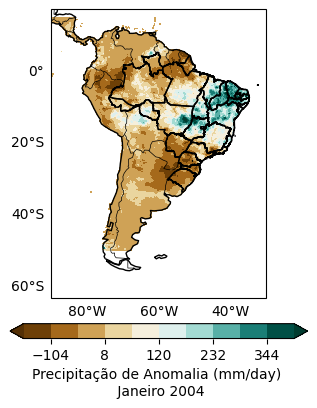

In [33]:
# Configuração da projeção do mapa e sua extensão geográfica
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-90.0, -30.0, -60.0, 15.0))
ax.coastlines(resolution='110m', color='black')
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')

# Configuração das grades do mapa
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.right_labels = False
gl.top_labels = False

# Define os níveis de contorno
levels = np.linspace(-160.0, 400.0, 11)  # Ajuste conforme necessário

# Inicializa um gráfico de contorno preenchido com os dados de anomalia
cnplot = ax.contourf(anomalia_jan_2004.longitude, anomalia_jan_2004.latitude, anomalia_jan_2004, cmap='BrBG', levels=levels, extend='both')

# Adiciona uma barra de cores (colorbar) na parte inferior do gráfico
cbar = plt.colorbar(cnplot, orientation='horizontal', pad=0.07, shrink=0.6)
cbar.set_label('Precipitação de Anomalia (mm/day) \n Janeiro 2004')
estados.plot(ax=ax, color='none', edgecolor='black')

# Salva a figura em um arquivo chamado 'anomalia_jan_2004.png' com uma resolução de 300 dpi
plt.savefig('anomalia_jan_2004.png', dpi=300)